In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filename = 'train_data.csv'

In [4]:
import os
os.getcwd()

'/Users/kaiwang/Desktop'

In [3]:
t1 = time.time()
reviews = pd.read_csv('first200.csv')
time.time() - t1

0.005750894546508789

In [18]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
reviews.describe()

,stars,longitude,latitude
count,200.000000,200.000000,200.000000
mean,3.840000,-97.893339,37.850081
std,1.269828,21.232335,4.161180
min,1.000000,-115.334510,33.261175
25%,3.000000,-115.145092,33.801347
50%,4.000000,-111.904642,36.118261
75%,5.000000,-80.000436,41.480936
max,5.000000,9.233530,48.806750


In [5]:
reviews['text length'] = reviews['text'].apply(len)
reviews.head()

,stars,name,text,date,city,longitude,latitude,categories,text length
0,1,McDonald's,Seriously cannot stand this McDonald's. They N...,2014-12-29,Glendale,-112.205020,33.509597,"['Burgers', 'Fast Food', 'Restaurants']",828
1,5,Tom Colicchio's Craftsteak,"Amazing food, truly excellent best lobster bis...",2013-03-07,Las Vegas,-115.169751,36.102918,"['Steakhouses', 'Restaurants', 'Cheesesteaks',...",209
2,5,Fishman Lobster Clubhouse Restaurant,"This was my second time here, and the seafood ...",2015-11-24,Toronto,-79.300795,43.824234,"['Seafood', 'Restaurants', 'Chinese', 'Live/Ra...",1234
3,1,Bonjour Brioche,"Long story short.\n\nBunch of rude, heartless,...",2016-12-20,Toronto,-79.346287,43.659795,"['Breakfast & Brunch', 'French', 'Restaurants']",1536
4,4,Dilly's Deli,We grabbed some dinner here last night before ...,2010-09-28,Tempe,-111.945365,33.422175,"['Caterers', 'Sandwiches', 'Event Planning & S...",416


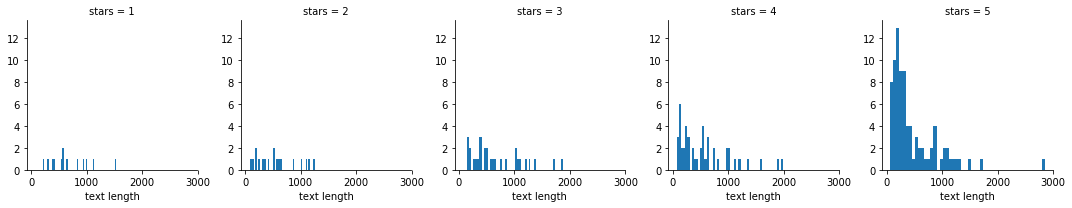

In [10]:
%matplotlib inline
g = sns.FacetGrid(data=reviews, col='stars')
g.map(plt.hist, 'text length', bins=50)

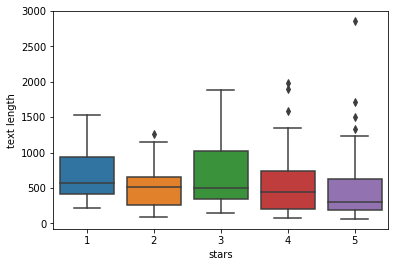

In [11]:
sns.boxplot(x='stars', y='text length', data=reviews)

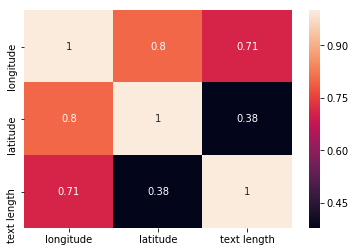

In [13]:
stars = reviews.groupby('stars').mean()
sns.heatmap(data=stars.corr(), annot=True)

In [4]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
import re

def clean_word(review):
    letters_only = re.sub('[^a-zA-Z]', ' ', review)
    words = letters_only.lower().split()
    stopwords_eng = set(stopwords.words("english"))
    new_sen = [x for x in words if not x in stopwords_eng]
   
    return(new_sen)

stemmer = PorterStemmer()

def stem_word(words, stemmer):
    sent=[stemmer.stem(word) for word in words]
    return (sent)

def text_process(text):
    clean=clean_word(text)
    sent=stem_word(clean,stemmer)
    return(sent)

#def tokenize(text):
  #  tokens = word_tokenize(text)
  #  stems = stem_word(tokens, stemmer)
  #  return stems

In [5]:
from collections import Counter
def balance_classes(xs, ys):
# Under sample xs, ys to balance classes
    freqs = Counter(ys)
 
    #the least common class is the maximum number we want for all classes
    max_allowable = freqs.most_common()[-1][1]
    num_added = {clss: 0 for clss in freqs.keys()}
    new_ys = []
    new_xs = []
    for i, y in enumerate(ys):
        if num_added[y] < max_allowable:
            new_ys.append(y)
            new_xs.append(xs[i])
            num_added[y] += 1
    return new_xs, new_ys

In [6]:
X=reviews["text"]
y=reviews["stars"]

In [7]:
print(Counter(y))
b_x, b_y = balance_classes(X, y)
print(Counter(b_y))

Counter({5: 85, 4: 47, 3: 32, 2: 23, 1: 13})
Counter({1: 13, 5: 13, 4: 13, 3: 13, 2: 13})


In [8]:
sent1=clean_word(reviews.loc[1,"text"])
sent1

['amazing',
 'food',
 'truly',
 'excellent',
 'best',
 'lobster',
 'bisque',
 'prime',
 'rib',
 'probably',
 'bedt',
 'ive',
 'great',
 'service',
 'downside',
 'size',
 'portions',
 'wasted',
 'lot',
 'food',
 'unfortunate']

In [10]:
text_process(reviews.loc[1,"text"])

['amaz',
 'food',
 'truli',
 'excel',
 'best',
 'lobster',
 'bisqu',
 'prime',
 'rib',
 'probabl',
 'bedt',
 'ive',
 'great',
 'servic',
 'downsid',
 'size',
 'portion',
 'wast',
 'lot',
 'food',
 'unfortun']

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(b_x)

In [25]:
bow_transformer.vocabulary_

{'serious': 1052,
 'cannot': 184,
 'stand': 1133,
 'mcdonald': 726,
 'never': 786,
 'get': 512,
 'order': 818,
 'right': 999,
 'food': 476,
 'almost': 22,
 'alway': 31,
 'suck': 1153,
 'servic': 1055,
 'sorri': 1110,
 'employe': 382,
 'sure': 1161,
 'show': 1066,
 'hate': 555,
 'job': 633,
 'way': 1298,
 'perform': 858,
 'work': 1326,
 'use': 1265,
 'teen': 1186,
 'high': 569,
 'school': 1035,
 'rememb': 979,
 'ever': 408,
 'take': 1174,
 'long': 695,
 'drive': 359,
 'thru': 1211,
 'bitter': 126,
 'fact': 429,
 'lol': 694,
 'top': 1232,
 'live': 689,
 'across': 5,
 'street': 1145,
 'find': 456,
 'often': 804,
 'ugh': 1254,
 'togeth': 1223,
 'peopl': 854,
 'guy': 544,
 'terribl': 1193,
 'honestli': 576,
 'anyth': 41,
 'nice': 788,
 'say': 1034,
 'place': 879,
 'usual': 1267,
 'review': 992,
 'talk': 1176,
 'mess': 738,
 'wait': 1287,
 'minut': 754,
 'morn': 764,
 'two': 1253,
 'coffe': 241,
 'standard': 1134,
 'back': 84,
 'less': 675,
 'car': 186,
 'amaz': 32,
 'truli': 1249,
 'excel':

In [63]:
tx = bow_transformer.transform(b_x)

In [68]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(tx, b_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [64]:
preds = nb.predict(tx)

In [71]:
review60 = reviews['text'][60]
review60

"We're from the other side of town, but met some California friends here after looking for a good pub!  All four of us had a very good experience. Jo and I split the Wally Burger and the Gruyere and Slab Bacon Mac.  Ryan W. was spot on - excellent s'mac!! Burger was good, but so juicy the bun just had to be set aside.  One friend had soup of the day with a burger.  Said the soup was wonderful!\n\nLoved the atmosphere and the service.  We'll be back!"

In [80]:
review_transformed60 = bow_transformer.transform([review60])
nb.predict(review_transformed60)[0]

4

In [70]:
reviews['stars'][60]

4

In [82]:
review100 = reviews['text'][100]
review100

'Food is really good but very small portions & wait staff was great to everyone else but us, had a young guy who seem to forget about us though the other waitresses were very attentive.'

In [83]:
review_transformed100 = bow_transformer.transform([review100])
nb.predict(review_transformed100)[0]

2

In [78]:
reviews['stars'][100]

2